In [5]:
import numpy as np 


p291 4.

In [14]:
def F_reverse(x,lam):
    """
    reverse the function F(x)=1-exp(-lam*x) 
    """
    return -1/lam*np.log(1-x)


In [17]:
u=np.random.uniform(0,1,100)
lam=2
v = F_reverse(u, lam)

In [18]:
from scipy import stats
# Check if the generated values follow the exponential distribution
k2, p_value = stats.kstest(v, 'expon', args=(0, 1/lam))
print(f"Kolmogorov-Smirnov test statistic: {k2}, p-value: {p_value}")

Kolmogorov-Smirnov test statistic: 0.0611782880439537, p-value: 0.8259515159867583


1. 生成n = 20, 30, 50个来自于Exp(1)的随机变量, 比较样本均值X̄的

精确分布、CLT近似分布和Bootstrap方法构造的分布之间的差异, 

并讨论Bootstrap方法相比于CLT近似方法的优缺点.

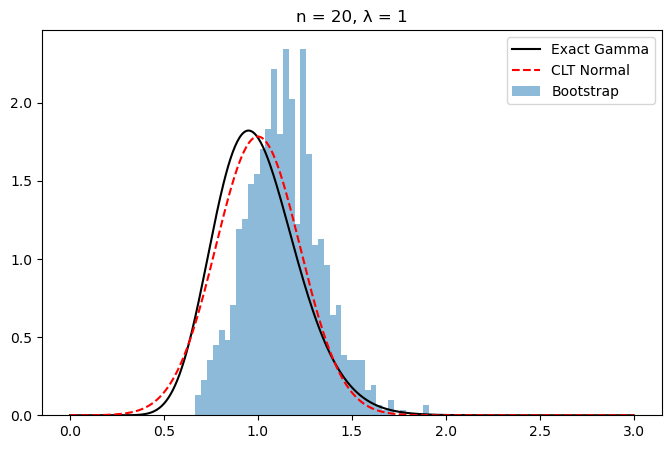

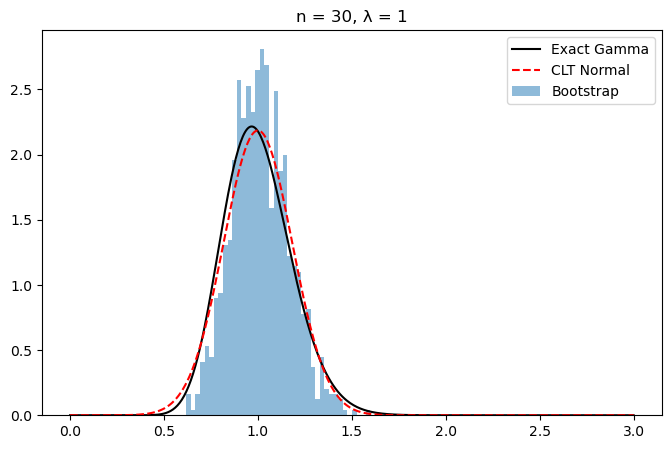

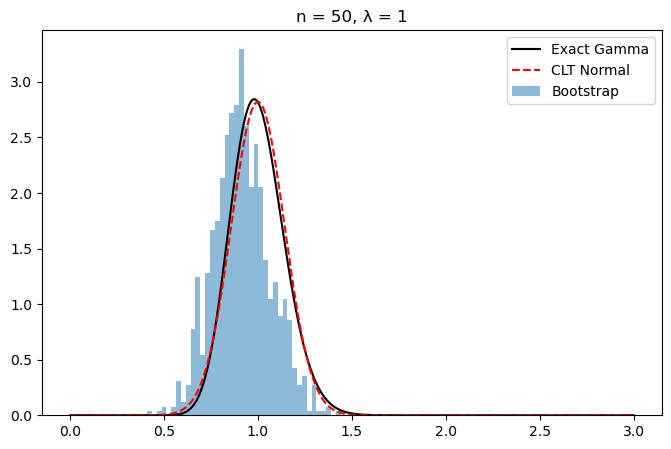

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

def compare_distributions(n, lam=1, B=1000):
    X = np.random.exponential(scale=1/lam, size=n)
    X_bar = np.mean(X)

    # 精确分布
    x_vals = np.linspace(0, 3, 500)
    gamma_pdf = gamma.pdf(x_vals, a=n, scale=1/(n*lam))

    # CLT 近似
    clt_pdf = norm.pdf(x_vals, loc=1/lam, scale=1/(lam*np.sqrt(n)))

    # Bootstrap 分布
    boot_means = []
    for _ in range(B):
        X_star = np.random.choice(X, size=n, replace=True)
        boot_means.append(np.mean(X_star))
    boot_means = np.array(boot_means)

    # 绘图
    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, gamma_pdf, 'k-', label='Exact Gamma')
    plt.plot(x_vals, clt_pdf, 'r--', label='CLT Normal')
    plt.hist(boot_means, bins=40, density=True, alpha=0.5, label='Bootstrap')
    plt.title(f'n = {n}, λ = {lam}')
    plt.legend()
    plt.show()

# 示例：n = 20, 30, 50
for n in [20, 30, 50]:
    compare_distributions(n)


2. 假设(Xi , Yi ), i = 1, · · · , n是来自于二元正态分布N (0, Σ)的一组独立同分布样本,

其中Σ =[[1,ro],[ro,1]]. 
对于不同样本数n = 20, 30, 50,

比较运用大样本理论和Bootstrap方法对样本相关系数r的渐近方差的估计效果

In [ ]:
def simulate_var_compare(rho=0.7, n=30, B=1000, trials=50):
    asymp_vars = []
    boot_vars = []

    for _ in range(trials):
        # 1. 生成正态样本
        cov = [[1, rho], [rho, 1]]
        data = np.random.multivariate_normal([0, 0], cov, size=n)
        x, y = data[:, 0], data[:, 1]

        # 2. 样本相关系数
        r = np.corrcoef(x, y)[0, 1]

        # 3. 渐近理论方差（Fisher变换）
        z_se = 1 / np.sqrt(n - 3)
        r_var_asymp = (z_se * 2 / (1 - r**2))**2  # 推导近似

        # 4. Bootstrap 方差
        r_star = []
        for _ in range(B):
            idx = np.random.choice(n, n, replace=True)
            r_b = np.corrcoef(x[idx], y[idx])[0, 1]
            r_star.append(r_b)
        r_var_boot = np.var(r_star, ddof=1)

        asymp_vars.append(r_var_asymp)
        boot_vars.append(r_var_boot)

    return np.array(asymp_vars), np.array(boot_vars)


/tmp/ipykernel_56697/4084455480.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([asymp, boot], labels=["Asymptotic", "Bootstrap"])


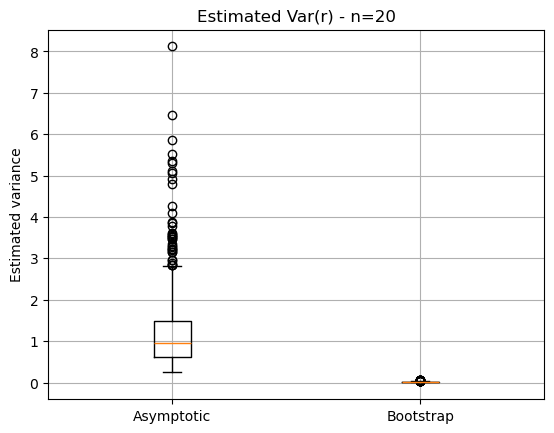

/tmp/ipykernel_56697/4084455480.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([asymp, boot], labels=["Asymptotic", "Bootstrap"])


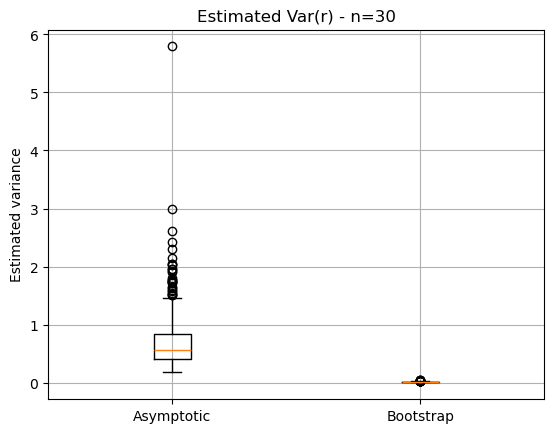

/tmp/ipykernel_56697/4084455480.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([asymp, boot], labels=["Asymptotic", "Bootstrap"])


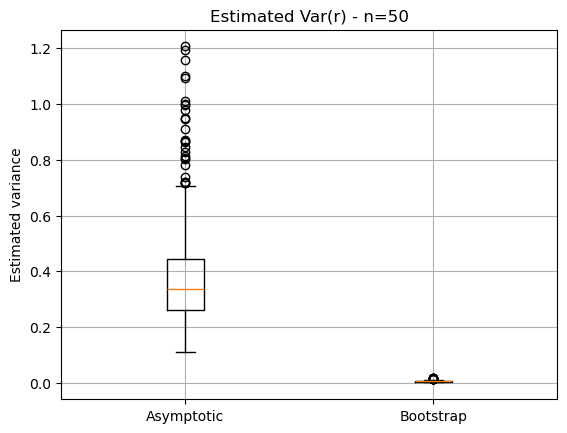

In [23]:
for n in [20, 30, 50]:
    asymp, boot = simulate_var_compare(n=n)
    plt.figure()
    plt.boxplot([asymp, boot], labels=["Asymptotic", "Bootstrap"])
    plt.title(f"Estimated Var(r) - n={n}")
    plt.ylabel("Estimated variance")
    plt.grid(True)
    plt.show()
